In [16]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [27]:
mbti_df = pd.read_csv("Resources/mbti.csv")
# Drop the null columns where all values are null
mbti_df = mbti_df.dropna(axis='columns', how='all')
# Drop the null rows
mbti_df = mbti_df.dropna()
mbti_df.head()

,type,posts,description,words_per_comment,squared_total_words,word_count_variance_per_comment,interrobangs_per_comment,i_e,n_s,f_t,j_p,sentiment_score_compound
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert Intuition Feeling Judging,11.12,22.24,135.2900,0.42,I,N,F,J,0.9877
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert Intuition Thinking Perceiving,23.40,46.80,187.4756,0.10,E,N,T,P,0.9993
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert Intuition Thinking Perceiving,16.72,33.44,180.6900,0.32,I,N,T,P,0.9985
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert Intuition Thinking Judging,21.28,42.56,181.8324,0.28,I,N,T,J,0.9966
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert Intuition Thinking Judging,19.34,38.68,196.4576,0.22,E,N,T,J,0.9725


In [28]:
mbti_df['sentiment_score_compound']

0       0.9877
1       0.9993
2       0.9985
3       0.9966
4       0.9725
         ...  
8670    0.9887
8671    0.9999
8672    0.9958
8673    0.9995
8674    0.9991
Name: sentiment_score_compound, Length: 8675, dtype: float64

# Select features (columns)

In [18]:
X = mbti_df[['words_per_comment','squared_total_words','squared_total_words','interrobangs_per_comment']]
y = mbti_df["type"].values.reshape(-1, 1)
print(X.shape, y.shape)

(8675, 4) (8675, 1)


# Create a Train Test Split

In [19]:

target_names = ["INFJ","INFP","INTJ",'INTP',"ISFJ","ISFP","ISTJ",'ISTP',"ENFJ","ENFP","ENTJ",'ENTP',"ESFJ","ESFP","ESTJ",'ESTP']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# Scale your data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

/Users/Jo/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Jo/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Train the Model

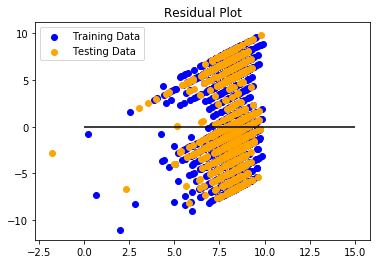

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, encoded_y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - encoded_y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - encoded_y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=encoded_y_test.min(), xmax=encoded_y_test.max())
plt.title("Residual Plot")
plt.show()

In [23]:
 from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(encoded_y_test, predictions)
r2 = model.score(X_test_scaled, encoded_y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 13.503020477601947, R2: 0.030805828349438236
